<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_XG_ADA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XGBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('resampled_SMOTEENN.csv')

print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Class distribution:\n", df.iloc[:, -1].value_counts())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy on the test set: {accuracy:.4f}")

Dataset shape: (1296, 10)
First 5 rows:
          ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.130069  0.429896 -0.880059     0.076701 -0.466388      1.784631   
1 -0.025474  0.690656  1.030045    -0.221090 -1.928916     -0.182325   
2  0.455775  0.708423  1.003237    -0.209494 -0.014799     -0.262002   
3  0.575991 -0.700001 -0.976301    -0.110170  0.640864      0.558874   
4 -1.467839 -0.149123  0.160967    -0.167227 -0.014799     -1.358502   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.505906         0.266900   0.173667           0  
1        0.581668         0.281920  -2.540388           0  
2       -0.461412         0.251424   1.457716           0  
3        0.662968         0.101032  -0.759307           0  
4        1.208343        -1.457058  -0.453147           0  
Class distribution:
 Potability
1    780
0    516
Name: count, dtype: int64
XGBoost Accuracy on the test set: 0.8577


# **XGBoost (Hyperparameter Tuning)**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('resampled_SMOTEENN.csv')


print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Class distribution:\n", df.iloc[:, -1].value_counts())
X = df.iloc[:, :-1]  # assuming the last column is the target
y = df.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


xgb_classifier = XGBClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # You can adjust the number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)

Dataset shape: (1296, 10)
First 5 rows:
          ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.130069  0.429896 -0.880059     0.076701 -0.466388      1.784631   
1 -0.025474  0.690656  1.030045    -0.221090 -1.928916     -0.182325   
2  0.455775  0.708423  1.003237    -0.209494 -0.014799     -0.262002   
3  0.575991 -0.700001 -0.976301    -0.110170  0.640864      0.558874   
4 -1.467839 -0.149123  0.160967    -0.167227 -0.014799     -1.358502   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.505906         0.266900   0.173667           0  
1        0.581668         0.281920  -2.540388           0  
2       -0.461412         0.251424   1.457716           0  
3        0.662968         0.101032  -0.759307           0  
4        1.208343        -1.457058  -0.453147           0  
Class distribution:
 Potability
1    780
0    516
Name: count, dtype: int64
Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy (Cross-Validation): {best_score:.4f}")

#Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
#Best Accuracy (Cross-Validation): 0.7915

best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy on the test set (Best Model): {accuracy:.4f}")
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy on the test set (Best Model): {accuracy:.4f}")

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Accuracy (Cross-Validation): 0.7915
XGBoost Accuracy on the test set (Best Model): 0.8423
XGBoost Accuracy on the test set (Best Model): 0.8423


XGBoost Accuracy on the test set (Best Model): 0.8423
Confusion Matrix:
 [[ 76  28]
 [ 13 143]]
Precision (weighted): 0.8433
Recall (weighted): 0.8423
F1 Score (weighted): 0.8398

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79       104
           1       0.84      0.92      0.87       156

    accuracy                           0.84       260
   macro avg       0.85      0.82      0.83       260
weighted avg       0.84      0.84      0.84       260



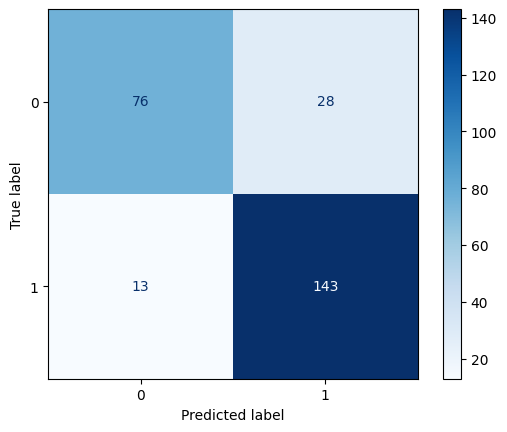

In [ ]:
!pip install matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

# Predictions using the best model
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy on the test set (Best Model): {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_classifier.classes_)
disp.plot(cmap='Blues')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Optional: Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



# **ADABoost**

Dataset shape: (1296, 10)
First 5 rows:
          ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.130069  0.429896 -0.880059     0.076701 -0.466388      1.784631   
1 -0.025474  0.690656  1.030045    -0.221090 -1.928916     -0.182325   
2  0.455775  0.708423  1.003237    -0.209494 -0.014799     -0.262002   
3  0.575991 -0.700001 -0.976301    -0.110170  0.640864      0.558874   
4 -1.467839 -0.149123  0.160967    -0.167227 -0.014799     -1.358502   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.505906         0.266900   0.173667           0  
1        0.581668         0.281920  -2.540388           0  
2       -0.461412         0.251424   1.457716           0  
3        0.662968         0.101032  -0.759307           0  
4        1.208343        -1.457058  -0.453147           0  
Class distribution:
 Potability
1    780
0    516
Name: count, dtype: int64

--- AdaBoost Best Parameters ---
{'estimator': DecisionTreeClassifier(max_depth=2), 'lear

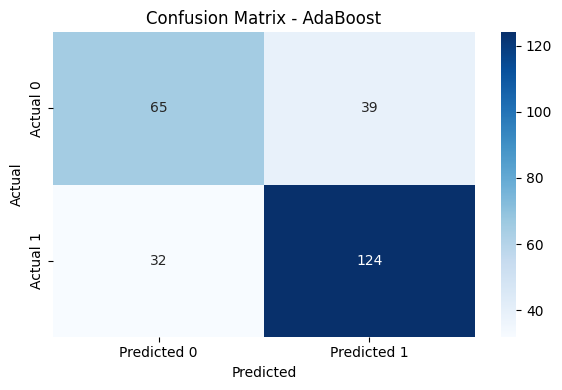

In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Load dataset
df = pd.read_csv('resampled_SMOTEENN.csv')
print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Class distribution:\n", df.iloc[:, -1].value_counts())

# 3. Feature and label separation
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 4. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Define parameter grid (fixed 'estimator' name)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# 7. Initialize AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# 8. GridSearchCV
grid_search_ada = GridSearchCV(estimator=ada,
                               param_grid=param_grid_ada,
                               cv=10,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

# 9. Predict with best model
best_model = grid_search_ada.best_estimator_
y_pred_ada = best_model.predict(X_test)

# 10. Evaluation
accuracy = accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)

print("\n--- AdaBoost Best Parameters ---")
print(grid_search_ada.best_params_)

print("\n--- AdaBoost Evaluation ---")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

# 11. Confusion Matrix Plot
conf_mat = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# **SVM**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



df = pd.read_csv('resampled_SMOTEENN.csv')



print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Class distribution:\n", df.iloc[:, -1].value_counts())
X = df.iloc[:, :-1]  # assuming the last column is the target
y = df.iloc[:, -1]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy on the test set (Default Hyperparameters): {accuracy:.4f}")


Dataset shape: (1296, 10)
First 5 rows:
          ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.130069  0.429896 -0.880059     0.076701 -0.466388      1.784631   
1 -0.025474  0.690656  1.030045    -0.221090 -1.928916     -0.182325   
2  0.455775  0.708423  1.003237    -0.209494 -0.014799     -0.262002   
3  0.575991 -0.700001 -0.976301    -0.110170  0.640864      0.558874   
4 -1.467839 -0.149123  0.160967    -0.167227 -0.014799     -1.358502   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.505906         0.266900   0.173667           0  
1        0.581668         0.281920  -2.540388           0  
2       -0.461412         0.251424   1.457716           0  
3        0.662968         0.101032  -0.759307           0  
4        1.208343        -1.457058  -0.453147           0  
Class distribution:
 Potability
1    780
0    516
Name: count, dtype: int64
SVM Accuracy on the test set (Default Hyperparameters): 0.8269


Dataset shape: (1296, 10)
First 5 rows:
          ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.130069  0.429896 -0.880059     0.076701 -0.466388      1.784631   
1 -0.025474  0.690656  1.030045    -0.221090 -1.928916     -0.182325   
2  0.455775  0.708423  1.003237    -0.209494 -0.014799     -0.262002   
3  0.575991 -0.700001 -0.976301    -0.110170  0.640864      0.558874   
4 -1.467839 -0.149123  0.160967    -0.167227 -0.014799     -1.358502   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.505906         0.266900   0.173667           0  
1        0.581668         0.281920  -2.540388           0  
2       -0.461412         0.251424   1.457716           0  
3        0.662968         0.101032  -0.759307           0  
4        1.208343        -1.457058  -0.453147           0  
Class distribution:
 Potability
1    780
0    516
Name: count, dtype: int64
Fitting 3 folds for each of 36 candidates, totalling 108 fits

--- Best Hyperparameters --

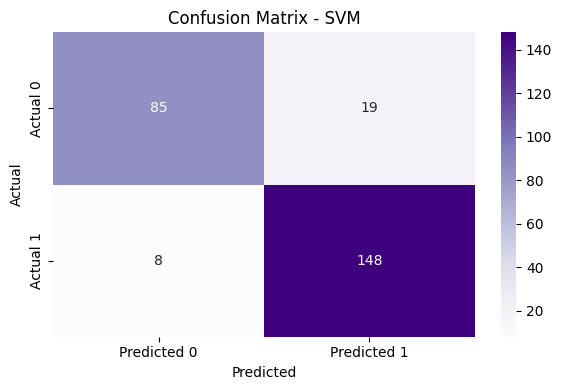

In [ ]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# 2. Load dataset
df = pd.read_csv('resampled_SMOTEENN.csv')
print("Dataset shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Class distribution:\n", df.iloc[:, -1].value_counts())

# 3. Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Define SVM classifier and hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svm_classifier = SVC(random_state=42)

# 7. Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# 8. Best model
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

# 9. Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 10. Print results
print("\n--- Best Hyperparameters ---")
print(grid_search.best_params_)
print(f"\nCross-Validation Accuracy (Best Model): {grid_search.best_score_:.4f}")
print(f"Test Accuracy : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 11. Confusion Matrix Plot
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
